# ---- Online shop ----

## 1st Part

In [50]:
import sqlite3
import pandas as pd

def connect_to_db(db_name: str):
    try:
        connection = sqlite3.connect(db_name)
        cursor = connection.cursor()
        print(f"Successfully connected to {db_name}")
        return connection , cursor
    except sqlite3.Error as error:
        print(f"Failed to connect to {db_name} , error: {error}")

def run_sql(query: str):
    return pd.read_sql_query(query , connection)



In [51]:
connection , cursor = connect_to_db("online_store.db")

Successfully connected to online_store.db


In [52]:
display(run_sql("SELECT name FROM sqlite_master WHERE type='table';"))

,name
0,customers
1,products
2,orders
3,reviews
4,marketing_campaigns


In [53]:
tables = ['customers' , 'products' , 'orders' , 'reviews' , 'marketing_campaigns']

for name in tables:
    print(f"======================TABLE:{name}===================================")
    display(run_sql(f"SELECT COUNT(*) FROM {name};"))


======================TABLE:customers===================================


,COUNT(*)
0,200


======================TABLE:products===================================


,COUNT(*)
0,20


======================TABLE:orders===================================


,COUNT(*)
0,1500


======================TABLE:reviews===================================


,COUNT(*)
0,900


======================TABLE:marketing_campaigns===================================


,COUNT(*)
0,6


## 2nd Part

In [54]:
display(run_sql("""
SELECT * 
FROM customers
;"""))

,customer_id,customer_name,city,registration_date,age,gender
0,1,Daniar Mustafin,Shymkent,2023-11-21,48,F
1,2,Madina Suleimenov,Shymkent,2024-04-26,54,M
2,3,Berik Aliev,Astana,2023-11-30,36,M
3,4,Kamila Zhanatova,Ust-Kamenogorsk,2024-06-15,41,F
4,5,Aida Mustafin,Shymkent,2023-03-09,63,M
...,...,...,...,...,...,...
195,196,Zhanna Aliev,Ust-Kamenogorsk,2023-06-19,28,F
196,197,Daniar Suleimenov,Astana,2024-02-22,50,F
197,198,Nurlan Aliev,Almaty,2024-04-28,43,F
198,199,Aidar Sarsenova,Almaty,2023-03-17,30,M


In [55]:
display(run_sql("""
SELECT orders.order_id ,orders.product_id , orders.order_date , 	orders.quantity , 	orders.total_amount , 	orders.status , 	orders.payment_method,	orders.delivery_days ,
customers.customer_id , 	customers.customer_name , 	customers.city , 	customers.registration_date , 	customers.age,	customers.gender
FROM orders
JOIN customers
ON orders.customer_id = customers.customer_id
;"""))

,order_id,product_id,order_date,quantity,total_amount,status,payment_method,delivery_days,customer_id,customer_name,city,registration_date,age,gender
0,1,11,2024-07-12,2,76000.0,Cancelled,Card,NaN,37,Daniar Bekova,Pavlodar,2024-05-02,18,M
1,2,4,2024-09-15,2,840000.0,Returned,Card,NaN,189,Madina Kairatov,Aktobe,2024-01-29,21,M
2,3,11,2024-09-22,2,76000.0,Completed,Card,6.0,111,Arman Aliev,Astana,2023-01-21,63,M
3,4,9,2024-10-08,2,190000.0,Cancelled,Card,NaN,182,Madina Mustafin,Pavlodar,2024-04-28,36,M
4,5,17,2024-10-16,3,555000.0,Returned,Cash,NaN,197,Daniar Suleimenov,Astana,2024-02-22,50,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,12,2024-02-01,3,24000.0,Completed,Card,5.0,176,Nurlan Sarsenova,Aktobe,2023-10-30,32,F
1496,1497,5,2024-01-02,2,360000.0,Completed,Card,7.0,6,Aida Mustafin,Astana,2023-01-26,54,F
1497,1498,20,2024-03-23,2,19000.0,Completed,Card,2.0,147,Aigerim Aliev,Ust-Kamenogorsk,2023-04-08,19,M
1498,1499,11,2024-11-12,1,38000.0,Completed,Card,6.0,164,Kamila Kassymov,Pavlodar,2023-06-09,41,M


In [56]:
display(run_sql("""
SELECT 
    customer_name, age,
    CASE 
        WHEN age between 18 and 30 THEN 'Young'
        WHEN age between 31 and 50 THEN 'Middle'
        ELSE 'Senior'
    END AS age_group
FROM customers
;"""))

,customer_name,age,age_group
0,Daniar Mustafin,48,Middle
1,Madina Suleimenov,54,Senior
2,Berik Aliev,36,Middle
3,Kamila Zhanatova,41,Middle
4,Aida Mustafin,63,Senior
...,...,...,...
195,Zhanna Aliev,28,Young
196,Daniar Suleimenov,50,Middle
197,Nurlan Aliev,43,Middle
198,Aidar Sarsenova,30,Young


In [57]:
display(run_sql("""
SELECT
    customer_id , total_amount,
    CASE 
        WHEN total_amount < 100000 THEN 'Small'
        WHEN total_amount between 100000 and 300000 THEN 'Medium'
        ELSE 'Large'
    END AS deal_size
FROM orders
;"""))

,customer_id,total_amount,deal_size
0,37,76000.0,Small
1,189,840000.0,Large
2,111,76000.0,Small
3,182,190000.0,Medium
4,197,555000.0,Large
...,...,...,...
1495,176,24000.0,Small
1496,6,360000.0,Large
1497,147,19000.0,Small
1498,164,38000.0,Small


In [58]:
display(run_sql("""
SELECT price , cost , price - cost as profit
FROM products
;"""))

,price,cost,profit
0,650000.0,480000.0,170000.0
1,550000.0,410000.0,140000.0
2,850000.0,650000.0,200000.0
3,420000.0,320000.0,100000.0
4,180000.0,130000.0,50000.0
5,380000.0,290000.0,90000.0
6,250000.0,190000.0,60000.0
7,85000.0,55000.0,30000.0
8,95000.0,62000.0,33000.0
9,45000.0,28000.0,17000.0


In [59]:
display(run_sql("""
SELECT
    product_id , total_amount,
    CASE
        WHEN status == 'Cancelled' or status == 'Returned' THEN 0
        ELSE delivery_days
    END as delivery_days
FROM orders
;"""))

,product_id,total_amount,delivery_days
0,11,76000.0,0
1,4,840000.0,0
2,11,76000.0,6
3,9,190000.0,0
4,17,555000.0,0
...,...,...,...
1495,12,24000.0,5
1496,5,360000.0,7
1497,20,19000.0,2
1498,11,38000.0,6


## 3rd Part

In [60]:
import pandas as pd

In [61]:

query = """
SELECT customers.city , orders.total_amount
FROM orders
    JOIN customers 
        ON orders.customer_id = customers.customer_id
;"""

df = pd.read_sql(query , connection)

pivot1 = pd.pivot_table(
    df,
    values = "total_amount",
    index = "city",
    aggfunc = "sum"
)
print(pivot1)

top_city = pivot1["total_amount"].idxmax()
top_money = pivot1["total_amount"].max()

print("-----------------------------------------------------")
print(f"TOP MONEY IN THE CITY: {top_city} = {top_money}")
print("-----------------------------------------------------")


                 total_amount
city                         
Aktobe             68847500.0
Almaty             90949500.0
Astana            109340000.0
Karaganda          84637000.0
Pavlodar          123667500.0
Shymkent           62249000.0
Taraz              82383000.0
Ust-Kamenogorsk   100041500.0
-----------------------------------------------------
TOP MONEY IN THE CITY: Pavlodar = 123667500.0
-----------------------------------------------------


In [62]:
query = """
SELECT customers.city , products.category , orders.total_amount
FROM customers
    JOIN orders
        ON customers.customer_id = orders.customer_id
    JOIN products
        ON orders.product_id = products.product_id
;"""

df = pd.read_sql(query , connection)

pivot2 =pd.pivot_table(
    df,
    columns = "category",
    values = "total_amount",
    index = "city",
    aggfunc = "sum"
)

print(pivot2)

category            Books   Clothing  Electronics        Home
city                                                         
Aktobe           486500.0  3791000.0   46850000.0  17720000.0
Almaty           577500.0  3487000.0   64070000.0  22815000.0
Astana           757000.0  7263000.0   74820000.0  26500000.0
Karaganda        468000.0  5194000.0   45870000.0  33105000.0
Pavlodar         963500.0  7229000.0   86700000.0  28775000.0
Shymkent         511000.0  4843000.0   36340000.0  20555000.0
Taraz            469000.0  3324000.0   48800000.0  29790000.0
Ust-Kamenogorsk  527500.0  5064000.0   70720000.0  23730000.0


In [63]:
query ="""
SELECT customers.customer_id , customers.customer_name , orders.status as completed_orders
FROM customers
    JOIN orders
        ON customers.customer_id = orders.customer_id
;"""

df = pd.read_sql( query , connection )

top_5 = df[df['completed_orders'] == 'Completed'].groupby(["customer_id", "customer_name"]).count().sort_values(by = "completed_orders" , ascending = False)
top_5 = top_5.head(5)

print(top_5)

                             completed_orders
customer_id customer_name                    
164         Kamila Kassymov                12
49          Damir Zhanatova                11
141         Zhanna Aliev                   11
196         Zhanna Aliev                   11
93          Dias Omarova                   10


In [64]:
 
query = """
SELECT customers.customer_id , products.brand , reviews.rating 
FROM customers
    JOIN orders
        ON customers.customer_id = orders.customer_id
    JOIN products
        ON orders.product_id = products.product_id
    JOIN reviews
        ON orders.order_id = reviews.order_id
;"""

df = pd.read_sql( query , connection )

avg_rating = df.groupby("brand")['rating'].mean().round(2)

print(avg_rating)


brand
Adidas      3.69
Apple       3.99
DeLonghi    3.68
Dyson       3.86
H&M         4.10
IKEA        4.25
Levis       3.66
Nike        3.67
Nintendo    3.84
OReilly     3.92
Penguin     3.84
Philips     4.08
Samsung     4.00
Sony        4.11
Various     4.00
Zara        3.90
Name: rating, dtype: float64


## 4th Part

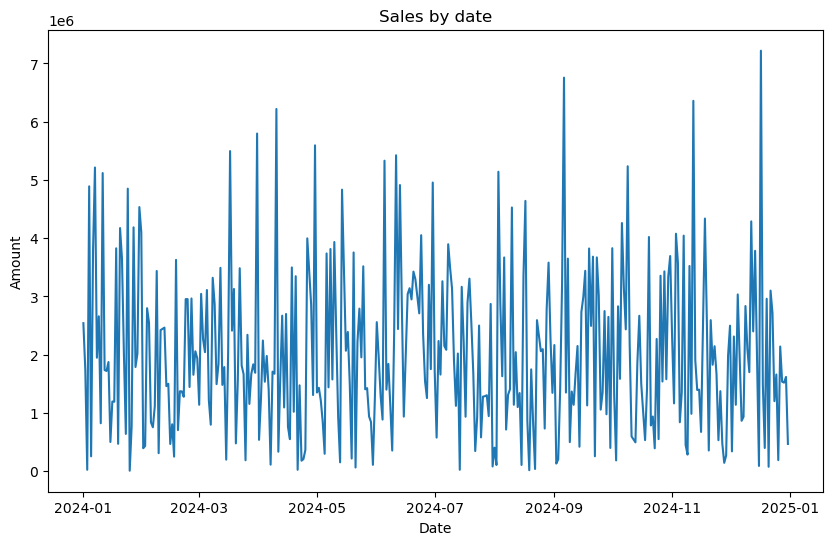

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

query = """
SELECT order_date, total_amount
FROM orders;
"""

df = pd.read_sql(query, connection)

df["order_date"] = pd.to_datetime(df["order_date"])

daily_sales = df.groupby("order_date")["total_amount"].sum()

daily_sales = daily_sales.sort_index()

plt.figure(figsize=(10,6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel("Date")
plt.ylabel("Amount")
plt.title("Sales by date")
plt.show()                             

             total_amount
category                 
Books           4760000.0
Clothing       40195000.0
Electronics   474170000.0
Home          202990000.0


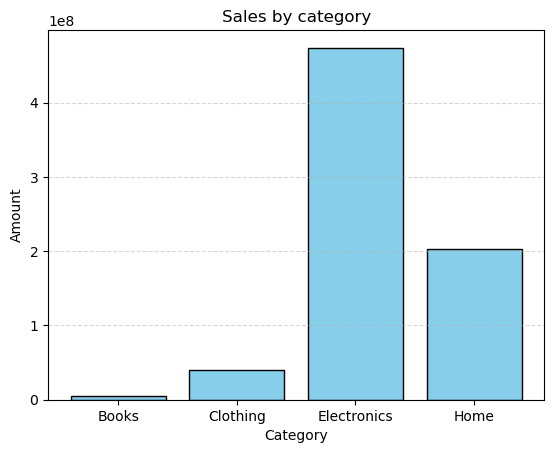

In [66]:
query = """
SELECT orders.total_amount , products.category
FROM orders
    JOIN products
        ON products.product_id = orders.product_id
;"""

df = pd.read_sql( query , connection )

pivot = pd.pivot_table(
    df,
    values = "total_amount",
    index = "category",
    aggfunc = "sum"
)

print(pivot)

plt.bar(pivot.index , pivot["total_amount"] , color = "skyblue" , edgecolor = "black")
plt.title("Sales by category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.grid(axis='y', linestyle='--', alpha=0.5)

Text(0, 0.5, 'price')

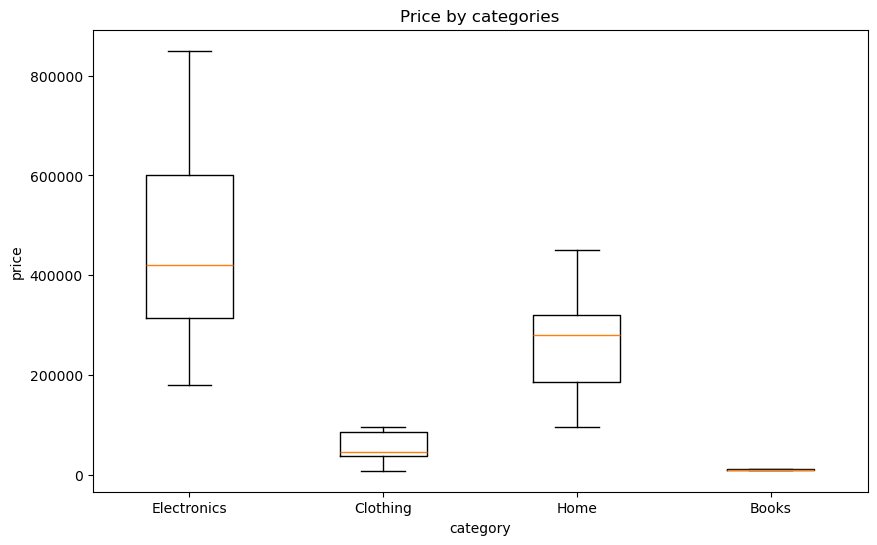

In [67]:

query = "SELECT category, price FROM products;"
df = pd.read_sql(query, connection)

categories = df['category'].unique()
data_to_plot = [df[df['category'] == cat]['price'] for cat in categories]

plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, tick_labels=categories)
plt.title("Price by categories")
plt.xlabel("category")
plt.ylabel("price")
                        ## чето boxplot ты тусыне алмадым

Text(0.5, 1.0, 'Payment methods')

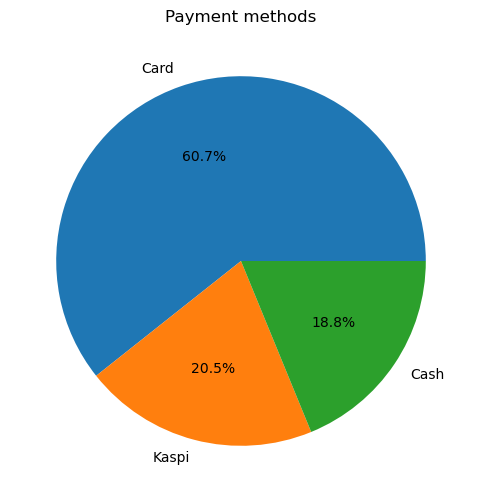

In [68]:
query = """
SELECT payment_method
FROM orders
;"""

df = pd.read_sql( query , connection ) 

payment_counts = df["payment_method"].value_counts()


plt.figure(figsize = (10,6))
plt.pie( payment_counts, labels = payment_counts.index , autopct = "%1.1f%%")

plt.title("Payment methods")